# Visualizing AMOC Streamfunction using CMIP6 data

### Import necessary packages

In [1]:
import xarray as xr
import xeofs as xe
import matplotlib.pyplot as plt
import intake
xr.set_options(display_style='html')

### Data catalog access

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


### Access and view amoc data

In [3]:
cat = col.search(table_id='Omon', experiment_id='piControl', source_id='FGOALS-g3', variable_id='msftmz', member_id='r1i1p1f1', grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CAS,FGOALS-g3,piControl,r1i1p1f1,Omon,msftmz,gn,gs://cmip6/CMIP6/CMIP/CAS/FGOALS-g3/piControl/...,NaN,20191125


In [4]:
datasets = cat.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
dset = list(datasets.values())[0]

### View dataset information

In [6]:
dset

<xarray.Dataset> Size: 658MB
Dimensions:         (lat: 316, bnds: 2, lev: 31, member_id: 1,
                     dcpp_init_year: 1, time: 8388, basin: 2)
Coordinates:
  * lat             (lat) float64 3kB -75.99 -75.75 -75.5 ... 89.37 89.62 89.87
    lat_bnds        (lat, bnds) float64 5kB dask.array<chunksize=(316, 2), meta=np.ndarray>
  * lev             (lev) float64 248B 0.0 10.0 20.0 ... 4.887e+03 5.6e+03
    lev_bnds        (lev, bnds) float64 496B dask.array<chunksize=(31, 2), meta=np.ndarray>
    sector          (basin) |S21 42B dask.array<chunksize=(2,), meta=np.ndarray>
  * time            (time) object 67kB 0001-01-16 13:00:00 ... 0699-12-16 12:...
    time_bnds       (time, bnds) object 134kB dask.array<chunksize=(8388, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds, basin
Data variables:
    msftmz          (member_id, dcpp_init_year, time, basin, lev, lat) float32 657MB dask.array<chunksize=(1, 1, 637, 2, 31, 316), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    branch_time_in_parent:            73000.0
    cmor_version:                     3.4.0
    ...                               ...
    intake_esm_attrs:variable_id:     msftmz
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/CAS/FGOALS-g3/piC...
    intake_esm_attrs:version:         20191125
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CAS.FGOALS-g3.piControl.Omon.gn

### Initial visualization of basin streamfunction profiles

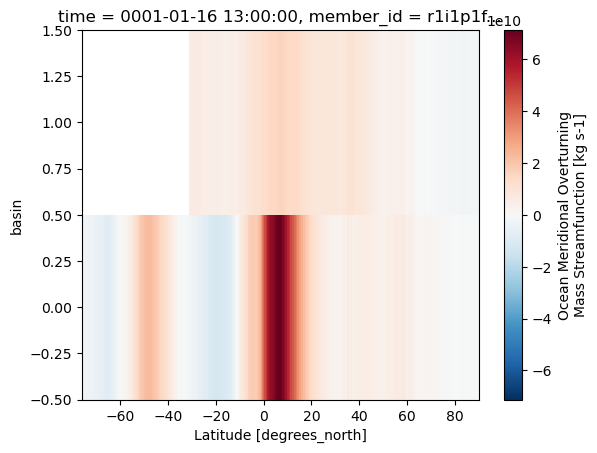

In [7]:
cross_section = dset['msftmz'].isel(time=0).mean(dim='lev')
cross_section.plot()

### Select cross section data at time 0, basin 1 (North atlantic basin)

In [8]:
atlantic_cross_section = dset['msftmz'].isel(time=0, basin=1, member_id=0, dcpp_init_year=0)
print(atlantic_cross_section.shape)

(31, 316)


## Cross-section of AMOC Streamfunction across latitude and depth

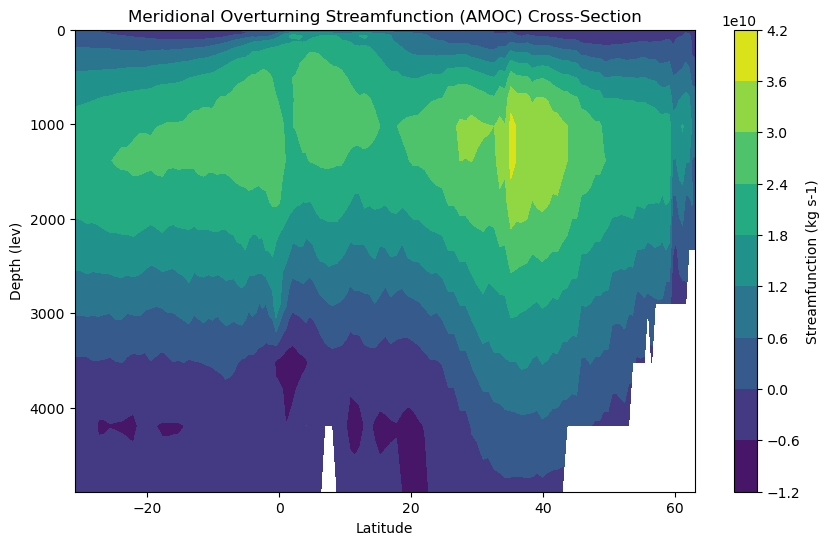

In [9]:
plt.figure(figsize=(10, 6))
plot = plt.contourf(atlantic_cross_section.lat, atlantic_cross_section.lev, atlantic_cross_section)
plt.title('Meridional Overturning Streamfunction (AMOC) Cross-Section')
plt.xlabel('Latitude')
plt.ylabel('Depth (lev)')
plt.xlim(-31,63)
plt.ylim(0,4890)
plt.gca().invert_yaxis()
plt.colorbar(plot, label='Streamfunction (kg s-1)')
plt.show()

### Plot the point with the highest average streamfunction over time

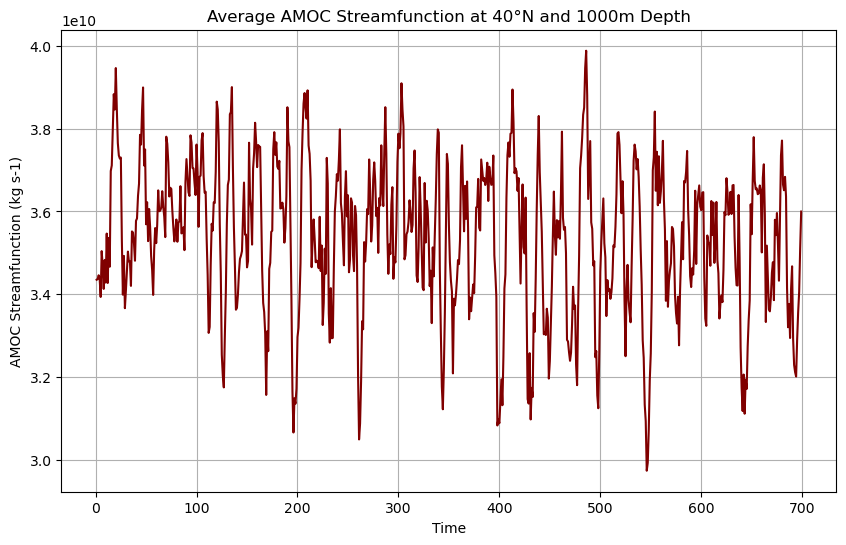

In [10]:
amoc = dset['msftmz']
amoc_at_strongest = amoc.sel(lat=40, lev=1000, method = 'nearest').sel(basin=1)
plt.figure(figsize=(10, 6))
amoc_at_strongest.groupby('time.year').mean().plot(color='maroon')
plt.xlabel('Time')
plt.ylabel('AMOC Streamfunction (kg s-1)') 
plt.title('Average AMOC Streamfunction at 40°N and 1000m Depth')
plt.grid(True)
plt.show()

### Plot AMOC streamfunction across all latitudes and depths in N. Atlantic basin


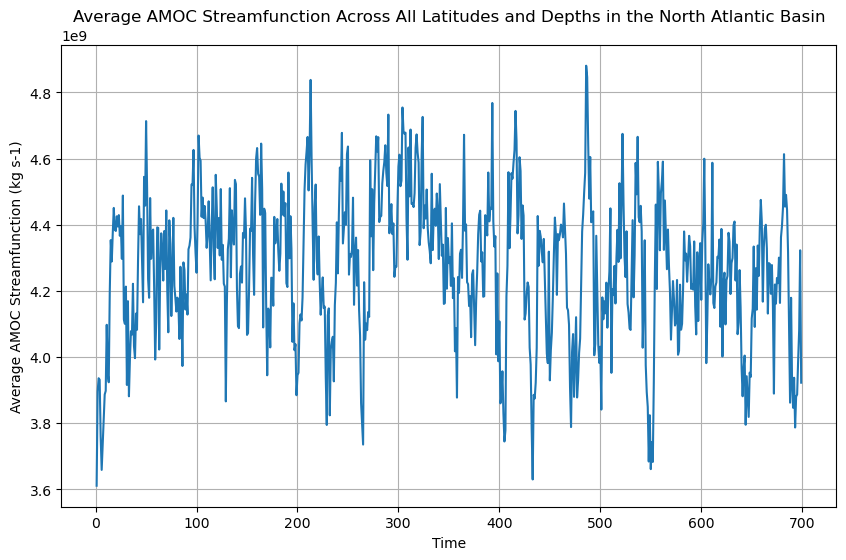

In [11]:
amoc_na = amoc.sel(basin=1)
amoc_na_avg = amoc_na.mean(dim=['lat', 'lev'])
plt.figure(figsize=(10, 6))
amoc_na_avg.groupby('time.year').mean().plot()
plt.xlabel('Time')
plt.ylabel('Average AMOC Streamfunction (kg s-1)')
plt.title('Average AMOC Streamfunction Across All Latitudes and Depths in the North Atlantic Basin')
plt.grid(True)
plt.show()

### Plot AMOC streamfunction at 26 N latitude and 1000 m depth


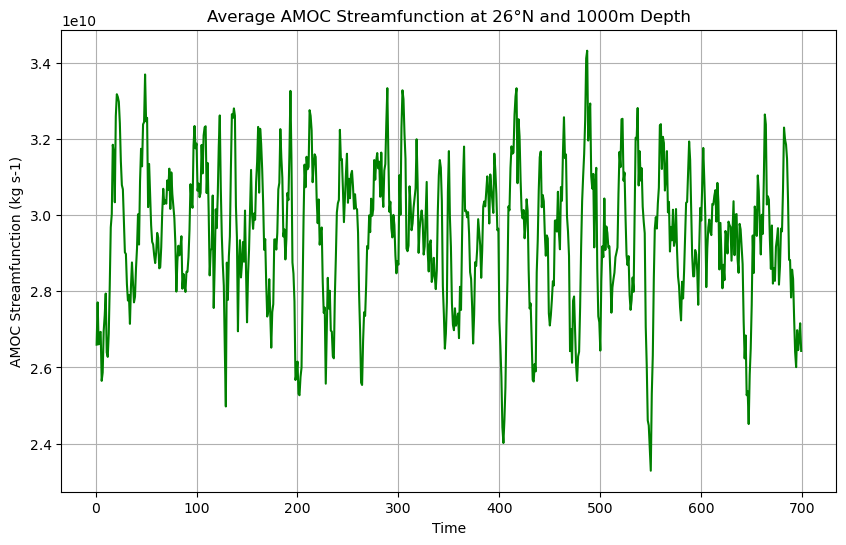

In [12]:
amoc_at_twentysix = amoc.sel(lat=26, lev=1000, method = 'nearest').sel(basin=1)
plt.figure(figsize=(10, 6))
amoc_at_twentysix.groupby('time.year').mean().plot(color='green')
plt.xlabel('Time')
plt.ylabel('AMOC Streamfunction (kg s-1)') 
plt.title('Average AMOC Streamfunction at 26°N and 1000m Depth')
plt.grid(True)
plt.show()

### Plot AMOC streamfunction over time at the equator and 1000m depth

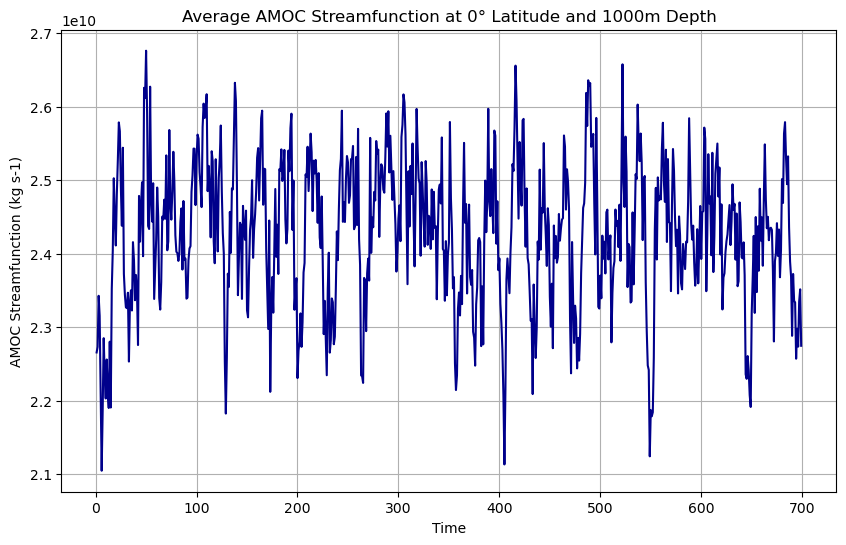

In [13]:
amoc_at_equator = amoc.sel(lat=0, lev=1000, method = 'nearest').sel(basin=1)
plt.figure(figsize=(10, 6))
amoc_at_equator.groupby('time.year').mean().plot(color='darkblue')
plt.xlabel('Time')
plt.ylabel('AMOC Streamfunction (kg s-1)') 
plt.title('Average AMOC Streamfunction at 0° Latitude and 1000m Depth')
plt.grid(True)
plt.show()

### Rolling Mean 26N Graph

In [16]:
cat = col.search(table_id='Omon', experiment_id ='abrupt-4xCO2', source_id='CESM2', variable_id='msftmz', member_id='r1i1p1f1', grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,abrupt-4xCO2,r1i1p1f1,Omon,msftmz,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/...,NaN,20190927


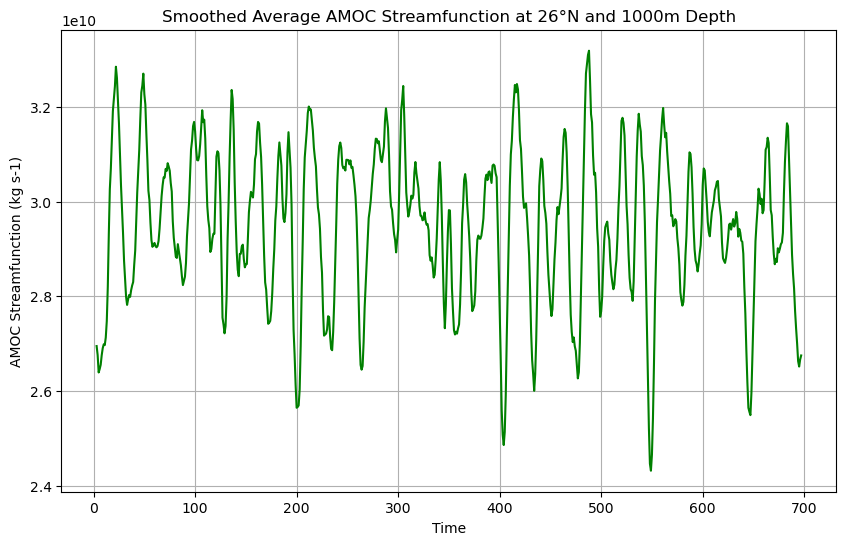

In [18]:
amoc_at_twentysix = amoc.sel(lat=26, lev=1000, method='nearest').sel(basin=1)

# Calculate the yearly mean
amoc_yearly_mean = amoc_at_twentysix.groupby('time.year').mean()

# Apply a rolling mean with a specified window size (e.g., 5 years)
amoc_smoothed = amoc_yearly_mean.rolling(year=5, center=True).mean()

# Plotting the smoothed data
plt.figure(figsize=(10, 6))
amoc_smoothed.plot(color='green')
plt.xlabel('Time')
plt.ylabel('AMOC Streamfunction (kg s-1)')
plt.title('Smoothed Average AMOC Streamfunction at 26°N and 1000m Depth')
plt.grid(True)
plt.show()